In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pf = pd.read_csv("/content/drive/MyDrive/ML/heart.csv")

In [ ]:
pf.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [ ]:
history_mapping = {'Absent': 0,'Present': 1}
pf["famhist"] = pf["famhist"].map(history_mapping)
pf.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


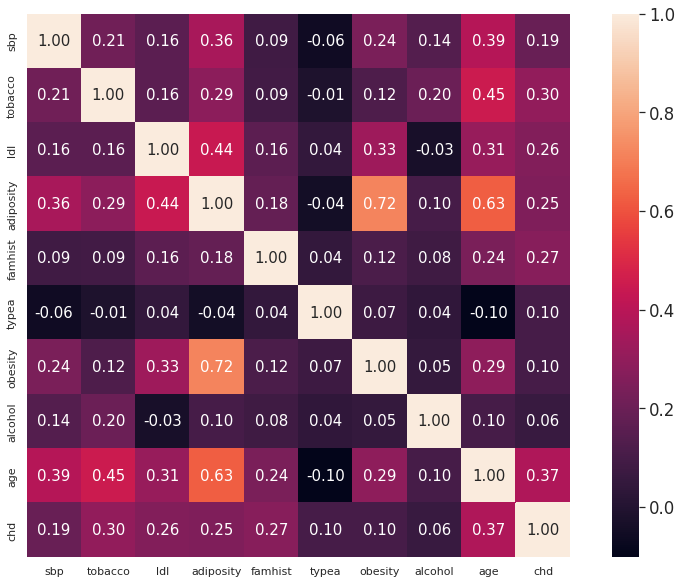

In [ ]:
sns.set(style='whitegrid', context='notebook')
cols = ['sbp','tobacco','ldl','adiposity','famhist','typea','obesity', 'alcohol','age', 'chd']
f, ax = plt.subplots(figsize=(15, 10))
cm = np.corrcoef(pf[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

In [ ]:
X = pf[['tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age']].values
y = pf[['chd']].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train,y_test = train_test_split(X,y,train_size = 0.9)

In [ ]:
# Apply logistic regression

from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(C=1,penalty='l2')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print ('Training Accuracy: %.2f' % model.score(X_train,y_train))

print ('Test Accuracy: %.2f' % model.score(X_test,y_test))

Training Accuracy: 0.75
Test Accuracy: 0.70


Text(0.5, 37.79999999999998, 'Predicted label')

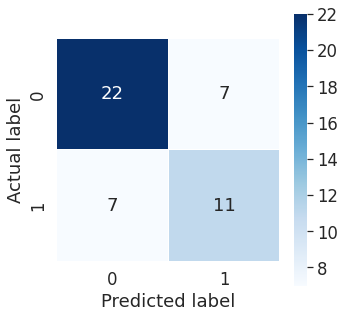

In [ ]:
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square =True, cmap ='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')